## 3D Example

In [24]:
using Revise, DeconvOptim, TestImages, Noise, CUDA, ImageShow, Colors, FFTW, OffsetArrays
FFTW.set_num_threads(4)
CUDA.allowscalar(false);

h_view(args...) = begin
    img = cat(args..., dims=2)
    img ./= maximum(img)
    Gray.(img)
end

h_view (generic function with 1 method)

In [8]:
# load test images
img = Float32.(testimage("simple_3d_ball"))

psf = permutedims(ifftshift(OffsetArrays.no_offset_view(Float32.(testimage("simple_3d_psf")))), (3,1,2))
psf_c = CuArray(psf)

img_b = conv_psf(img, psf, [1,2,3])
img_n = poisson(img_b, 300);

img_n_c = CuArray(img_n);

In [3]:
reg = TV(mode="forward", num_dims=3)

#88 (generic function with 1 method)

In [21]:
@time resG, optim_res = deconvolution(img_n, psf, padding=0.01, loss=Poisson(), regularizer=nothing, λ=0.005, iterations=20)

  1.471627 seconds (37.99 k allocations: 1.429 GiB, 17.39% gc time)


(Float32[0.00041543168 0.00019105685 … 0.00019018567 0.0004165984; 0.00052802154 7.8586796f-5 … 7.779983f-5 0.00052907586; … ; 0.0005297326 7.721158f-5 … 7.750555f-5 0.0005290768; 0.00041756945 0.00018917074 … 0.00018975111 0.0004165986]

Float32[0.00019091163 0.00017055433 … 0.00017074833 0.00018975054; 7.858684f-5 0.0001792825 … 0.00017917526 7.750536f-5; … ; 7.711407f-5 0.00017912535 … 0.00017917548 7.77996f-5; 0.00018902589 0.00017091646 … 0.00017074816 0.00019018538]

Float32[2.390524f-5 6.388624f-5 … 6.352821f-5 2.428523f-5; 7.842095f-5 1.8770714f-5 … 1.8518636f-5 7.910969f-5; … ; 7.922431f-5 1.8472982f-5 … 1.8633016f-5 7.870807f-5; 2.4412771f-5 6.3369305f-5 … 6.3687374f-5 2.4031786f-5]

...

Float32[2.3821029f-5 6.44249f-5 … 6.458412f-5 2.2683182f-5; 7.836351f-5 1.90697f-5 … 2.0176325f-5 7.517197f-5; … ; 7.573066f-5 1.9815936f-5 … 2.2095439f-5 6.626829f-5; 2.2138596f-5 6.546177f-5 … 6.924656f-5 1.641233f-5]

Float32[0.0001909122 0.00017055421 … 0.00017091633 0.0001891712; 7.8488

In [13]:
reg_c = TV_cuda(num_dims=3)

#56 (generic function with 1 method)

In [17]:
@time resG_c, optim_res_c = deconvolution(img_n_c, psf_c, padding = 0.01, loss=Poisson(), regularizer=nothing, λ=0.005, iterations=20)

  0.129492 seconds (127.80 k allocations: 5.748 MiB)


(Float32[0.00041444186 0.00019670745 … 0.00019583215 0.00041561452; 0.000527871 8.303348f-5 … 8.223077f-5 0.0005289389; … ; 0.00052960153 8.163162f-5 … 8.1931285f-5 0.00052893796; 0.0004165898 0.00019481202 … 0.00019539468 0.000415614]

Float32[0.00019656081 0.0001605651 … 0.00016075409 0.00019539402; 8.303263f-5 0.00016938505 … 0.00016928554 8.193063f-5; … ; 8.153181f-5 0.00016923947 … 0.00016928553 8.223005f-5; 0.00019466614 0.00016091819 … 0.0001607542 0.00019583138]

Float32[2.0596914f-5 5.9626404f-5 … 5.928636f-5 2.0947746f-5; 7.1920156f-5 1.7004671f-5 … 1.676873f-5 7.2576026f-5; … ; 7.2685594f-5 1.6725988f-5 … 1.6875727f-5 7.219367f-5; 2.106479f-5 5.913526f-5 … 5.9437418f-5 2.0713926f-5]

...

Float32[2.0519448f-5 6.013763f-5 … 6.028883f-5 1.9472784f-5; 7.1866154f-5 1.7283939f-5 … 1.8319184f-5 6.8832866f-5; … ; 6.936289f-5 1.798193f-5 … 2.0113579f-5 6.0385777f-5; 1.8971941f-5 6.1122206f-5 … 6.4713175f-5 1.37411635f-5]

Float32[0.00019656091 0.00016056483 … 0.00016091812 0.0001948

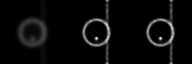

In [18]:
h_view(img_n[32, :, :], resG[32, :, :], Array(resG_c)[32, :, :])

In [23]:
resG ≈ Array(resG_c)

true